In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [46]:
## read csv file into a pandas dataframe with semicolon delimiter.

df = pd.read_csv('customer_data.csv', delimiter=';', low_memory=False)
df

,Order_id,Inserted Date,Item_id,qty_Price,Order_Status,order_channel,qty,shippingmethod,product_category,Customer_ID
0,125943,2020-02-05,58416,0.193277,Invoiced,CALLCENTER,100.0,STORE,Stationery,9693
1,125943,2020-02-05,47390,0.605042,Invoiced,CALLCENTER,20.0,STORE,Stationery,9693
2,125943,2020-02-05,47384,1.689075,Invoiced,CALLCENTER,80.0,STORE,Stationery,9693
3,212252,2020-02-29,48014,11.512605,Invoiced,CALLCENTER,1.0,COURIER,Toys,9694
4,212252,2020-02-29,24906,1.680672,Invoiced,CALLCENTER,1.0,COURIER,Toys,9694
...,...,...,...,...,...,...,...,...,...,...
303208,146998,2020-01-31,8553,5.058823,Invoiced,WEB,1.0,STORE,Books,138942
303209,146998,2020-01-31,16293,5.033613,Invoiced,WEB,1.0,STORE,Books,138942
303210,171281,2020-02-09,20381,6.605042,Invoiced,WEB,1.0,COURIER,Books,138943
303211,171281,2020-02-09,22197,7.050420,Invoiced,WEB,1.0,COURIER,Books,138943


In [47]:
df.head() # display the first 5 rows

,Order_id,Inserted Date,Item_id,qty_Price,Order_Status,order_channel,qty,shippingmethod,product_category,Customer_ID
0,125943,2020-02-05,58416,0.193277,Invoiced,CALLCENTER,100.0,STORE,Stationery,9693
1,125943,2020-02-05,47390,0.605042,Invoiced,CALLCENTER,20.0,STORE,Stationery,9693
2,125943,2020-02-05,47384,1.689075,Invoiced,CALLCENTER,80.0,STORE,Stationery,9693
3,212252,2020-02-29,48014,11.512605,Invoiced,CALLCENTER,1.0,COURIER,Toys,9694
4,212252,2020-02-29,24906,1.680672,Invoiced,CALLCENTER,1.0,COURIER,Toys,9694


In [48]:
df.tail() #display the last 5 rows.

,Order_id,Inserted Date,Item_id,qty_Price,Order_Status,order_channel,qty,shippingmethod,product_category,Customer_ID
303208,146998,2020-01-31,8553,5.058823,Invoiced,WEB,1.0,STORE,Books,138942
303209,146998,2020-01-31,16293,5.033613,Invoiced,WEB,1.0,STORE,Books,138942
303210,171281,2020-02-09,20381,6.605042,Invoiced,WEB,1.0,COURIER,Books,138943
303211,171281,2020-02-09,22197,7.050420,Invoiced,WEB,1.0,COURIER,Books,138943
303212,171281,2020-02-09,21803,4.714285,Invoiced,WEB,1.0,COURIER,Books,138943


# memory usage is 23.1+MB

In [49]:
df.info() # check for the information of the dataframe, the datatypes, the memory usage, the columns, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303213 entries, 0 to 303212
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_id          303213 non-null  int64  
 1   Inserted Date     303213 non-null  object 
 2   Item_id           303213 non-null  int64  
 3   qty_Price         303213 non-null  float64
 4   Order_Status      303213 non-null  object 
 5   order_channel     303213 non-null  object 
 6   qty               303212 non-null  float64
 7   shippingmethod    303213 non-null  object 
 8   product_category  303213 non-null  object 
 9   Customer_ID       303213 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.1+ MB


In [50]:
df.isnull().values.any() # check if there nan values

True

In [51]:
df.isnull().sum() # if there are nan values , check how many are there in each column.

Order_id            0
Inserted Date       0
Item_id             0
qty_Price           0
Order_Status        0
order_channel       0
qty                 1
shippingmethod      0
product_category    0
Customer_ID         0
dtype: int64

In [52]:
df.value_counts(subset=['shippingmethod']) 

shippingmethod
STORE             216845
COURIER            84648
COURIER_PUP         1676
GROUND                39
GROUNDMIX              5
dtype: int64

In [53]:
df['qty'].fillna(0, inplace=True) #replace nan values with a 0 .

In [54]:
df.columns # display the columns.

Index(['Order_id', 'Inserted Date', 'Item_id', 'qty_Price', 'Order_Status',
       'order_channel', 'qty', 'shippingmethod', 'product_category',
       'Customer_ID'],
      dtype='object')

In [55]:
df['Order_Status'].unique()

array(['Invoiced', 'Cancelled'], dtype=object)

In [56]:
df['order_channel'].unique()

array(['CALLCENTER', 'WEB', 'STORE'], dtype=object)

In [57]:
df['shippingmethod'].unique()    

array(['STORE', 'COURIER', 'GROUND', 'COURIER_PUP', 'GROUNDMIX'],
      dtype=object)

In [58]:
df['product_category'].unique()

array(['Stationery', 'Toys', 'Books', 'Gaming', 'IT',
       'TV & Home Entertainment', 'Music & Films', 'Telephony', 'SDA',
       'Digital', 'Home Comfort', 'Air Condition', 'Photo', 'MDA',
       'Personal Care', 'Consumables - WΗ Materials', 'iQos',
       'Home Equipment', 'Professional Display', 'Other Categories',
       'Other B2B Categories'], dtype=object)

In [59]:
df['Order_Status'] = df['Order_Status'].astype('category')

df['order_channel'] = df['order_channel'].astype('category')

df['shippingmethod'] = df['shippingmethod'].astype('category')

df['product_category'] = df['product_category'].astype('category')

#convert the datatypes of strings to categorical for memory efficiency.

In [60]:
df['Inserted Date'][0]

'2020-02-05'

In [61]:
# convert the 'Inserted Date' column to datetime format because it's initial form is string.
df['Inserted Date'] = pd.to_datetime(df['Inserted Date'])

In [62]:
# round the 'qty_Price' column to 2 decimal places for memory effciency.
df['qty_Price'] = df['qty_Price'].round(2)

In [63]:
df['qty'].unique() # find the unique values of the column qty.

array([100.,  20.,  80.,   1.,   2.,   3.,   4.,   6.,   5.,  10.,  15.,
        -1.,  14.,   8.,  50.,   9.,  12.,   7.,  11.,  22., 175.,  25.,
       205.,  40.,  35.,  21.,  30.,  13.,  18.,  27.,  -3.,  -2.,  17.,
        16.,  23.,  32.,  62.,  57.,  19., 102.,  26.,  72.,  24.,  90.,
        84.,   0.,  28.,  33.,  60.,  -5.,  55., 300.,  70., 120.,  -4.,
        37.,  42., 103.])

In [64]:
df['qty'] = df['qty'].astype(np.int32) # convert the datatype from float64 ot from int64 to int32 for 
#memory efficiency. 


df['Order_id'] = df['Order_id'].astype(np.int32)

df['Customer_ID'] = df['Customer_ID'].astype(np.int32)

df['Item_id'] = df['Item_id'].astype(np.int32)

In [65]:
df['Inserted Date'].unique()

array(['2020-02-05T00:00:00.000000000', '2020-02-29T00:00:00.000000000',
       '2020-02-07T00:00:00.000000000', '2020-02-06T00:00:00.000000000',
       '2020-01-08T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-02-22T00:00:00.000000000', '2020-02-14T00:00:00.000000000',
       '2020-01-18T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-02-21T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-19T00:00:00.000000000',
       '2020-02-11T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
       '2020-01-28T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-30T00:00:00.000000000', '2020-02-03T00:00:00.000000000',
       '2020-01-16T00:00:00.000000000', '2020-02-28T00:00:00.000000000',
       '2020-02-26T00:00:00.000000000', '2020-02-19T00:00:00.000000000',
       '2020-02-04T00:00:00.000000000', '2020-02-13T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-02-18

# Memory usage from 23.1+ MB that was before , now is 10.4 MB

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303213 entries, 0 to 303212
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_id          303213 non-null  int32         
 1   Inserted Date     303213 non-null  datetime64[ns]
 2   Item_id           303213 non-null  int32         
 3   qty_Price         303213 non-null  float64       
 4   Order_Status      303213 non-null  category      
 5   order_channel     303213 non-null  category      
 6   qty               303213 non-null  int32         
 7   shippingmethod    303213 non-null  category      
 8   product_category  303213 non-null  category      
 9   Customer_ID       303213 non-null  int32         
dtypes: category(4), datetime64[ns](1), float64(1), int32(4)
memory usage: 10.4 MB


In [67]:
df.describe()


,Order_id,Item_id,qty_Price,qty,Customer_ID
count,303213.000000,303213.000000,303213.000000,303213.000000,303213.000000
mean,116639.391032,47307.818151,33.208920,1.118293,74870.664223
std,62903.907959,22284.540422,145.476143,1.665328,37348.983580
min,10000.000000,5557.000000,0.000000,-5.000000,8890.000000
25%,59881.000000,27529.000000,4.920000,1.000000,42600.000000
50%,115356.000000,48416.000000,8.810000,1.000000,75102.000000
75%,171126.000000,67184.000000,15.060000,1.000000,107494.000000
max,227302.000000,82750.000000,47430.090000,300.000000,139290.000000


In [68]:
df['total_sales_each_item'] = df['qty'] * df['qty_Price']

#find the total sales per item  and assign the value to a new column.

In [69]:
df

,Order_id,Inserted Date,Item_id,qty_Price,Order_Status,order_channel,qty,shippingmethod,product_category,Customer_ID,total_sales_each_item
0,125943,2020-02-05,58416,0.19,Invoiced,CALLCENTER,100,STORE,Stationery,9693,19.00
1,125943,2020-02-05,47390,0.61,Invoiced,CALLCENTER,20,STORE,Stationery,9693,12.20
2,125943,2020-02-05,47384,1.69,Invoiced,CALLCENTER,80,STORE,Stationery,9693,135.20
3,212252,2020-02-29,48014,11.51,Invoiced,CALLCENTER,1,COURIER,Toys,9694,11.51
4,212252,2020-02-29,24906,1.68,Invoiced,CALLCENTER,1,COURIER,Toys,9694,1.68
...,...,...,...,...,...,...,...,...,...,...,...
303208,146998,2020-01-31,8553,5.06,Invoiced,WEB,1,STORE,Books,138942,5.06
303209,146998,2020-01-31,16293,5.03,Invoiced,WEB,1,STORE,Books,138942,5.03
303210,171281,2020-02-09,20381,6.61,Invoiced,WEB,1,COURIER,Books,138943,6.61
303211,171281,2020-02-09,22197,7.05,Invoiced,WEB,1,COURIER,Books,138943,7.05


In [70]:
sales_by_category = df.groupby('product_category')['total_sales_each_item'].sum().sort_values(ascending=False).reset_index()
sales_by_category


,product_category,total_sales_each_item
0,IT,2461581.15
1,Books,1995822.28
2,Telephony,1817175.77
3,TV & Home Entertainment,1553792.78
4,MDA,715629.91
5,Gaming,472658.87
6,SDA,380127.40
7,Home Comfort,228123.30
8,Music & Films,222509.63
9,Photo,181525.47


# The majority of the total sales are produced by IT products

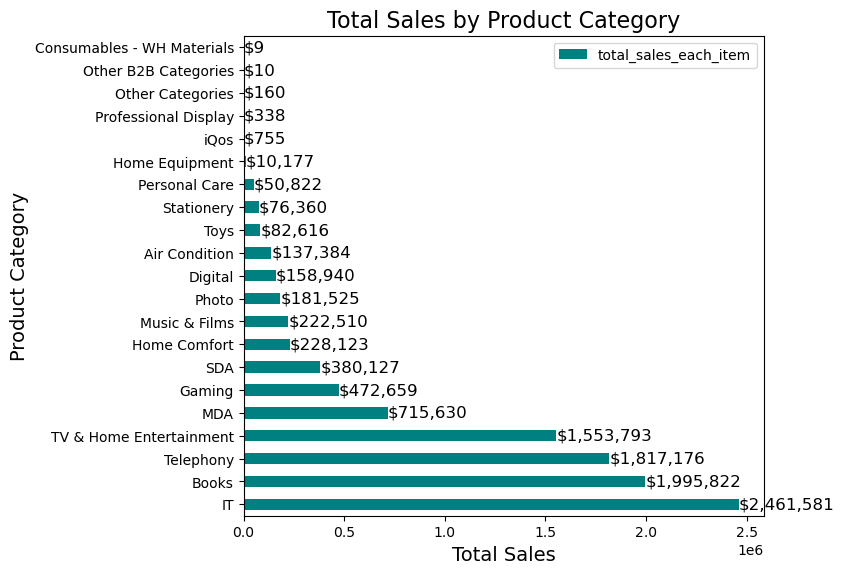

In [71]:
# create the plot and axes objects
fig, ax = plt.subplots(figsize=(8, 6))

# plot the horizontal bar chart
sales_by_category.plot(kind='barh', x='product_category', y='total_sales_each_item', ax=ax, color='teal')

# set axis labels and title
ax.set_xlabel('Total Sales', fontsize=14)
ax.set_ylabel('Product Category', fontsize=14)
ax.set_title('Total Sales by Product Category', fontsize=16)

# add value labels to the bars
for i, v in enumerate(sales_by_category['total_sales_each_item']):
    ax.text(v + 10, i, f'${v:,.0f}', fontsize=12, va='center')

# adjust plot margins
plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.1)

# show the plot
plt.show()


# above are the findings about how much is the price for each product category

In [72]:
price_per_category = df.groupby('product_category').agg(
    avg_price_per_unit=('qty_Price', 'mean')
).sort_values('avg_price_per_unit', ascending=False).reset_index()

price_per_category.round(2)


#Professional Display product_category is the the most expensive.

,product_category,avg_price_per_unit
0,Professional Display,338.17
1,Air Condition,335.57
2,MDA,275.96
3,TV & Home Entertainment,170.96
4,Telephony,128.75
5,Photo,128.30
6,IT,114.46
7,Home Comfort,104.22
8,Digital,60.26
9,SDA,50.93


In [73]:
df.head()

,Order_id,Inserted Date,Item_id,qty_Price,Order_Status,order_channel,qty,shippingmethod,product_category,Customer_ID,total_sales_each_item
0,125943,2020-02-05,58416,0.19,Invoiced,CALLCENTER,100,STORE,Stationery,9693,19.00
1,125943,2020-02-05,47390,0.61,Invoiced,CALLCENTER,20,STORE,Stationery,9693,12.20
2,125943,2020-02-05,47384,1.69,Invoiced,CALLCENTER,80,STORE,Stationery,9693,135.20
3,212252,2020-02-29,48014,11.51,Invoiced,CALLCENTER,1,COURIER,Toys,9694,11.51
4,212252,2020-02-29,24906,1.68,Invoiced,CALLCENTER,1,COURIER,Toys,9694,1.68


In [74]:
sales_by_channel = df.groupby('order_channel')['total_sales_each_item'].sum().sort_values(ascending=False).reset_index()
sales_by_channel

,order_channel,total_sales_each_item
0,WEB,8764937.02
1,CALLCENTER,1780091.63
2,STORE,1490.24


# The channel that produces most of the sales is web, customers tend to buy more thought the website because it is more easily and more accesible for them.

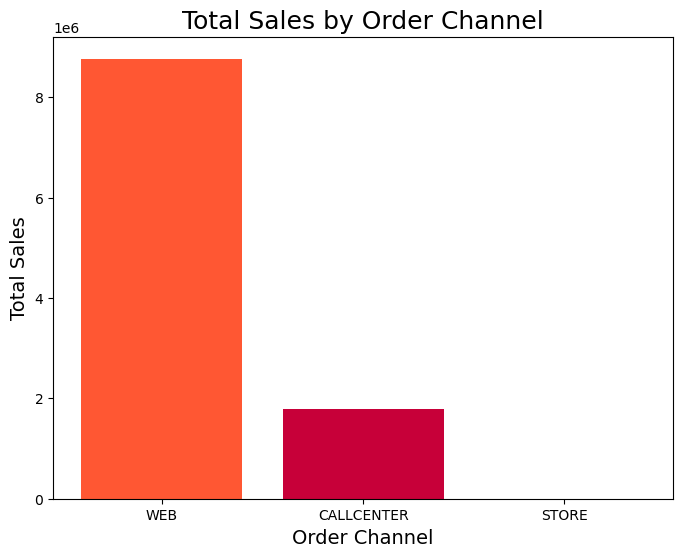

In [75]:
plt.figure(figsize=(8, 6))
plt.bar(sales_by_channel['order_channel'], sales_by_channel['total_sales_each_item'], color=['#FF5733', '#C70039', '#900C3F'])
plt.xlabel('Order Channel', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Total Sales by Order Channel', fontsize=18)
plt.show()

In [76]:
sales_by_category_and_date = df.groupby(['order_channel', 'Inserted Date'])['total_sales_each_item'].sum().sort_values(ascending=False).reset_index()

In [77]:
sales_by_category_and_date = sales_by_category_and_date.pivot(index='Inserted Date', columns='order_channel', values='total_sales_each_item')

# the total sales of each channel throught the time from jan 2020 to mar 2020.

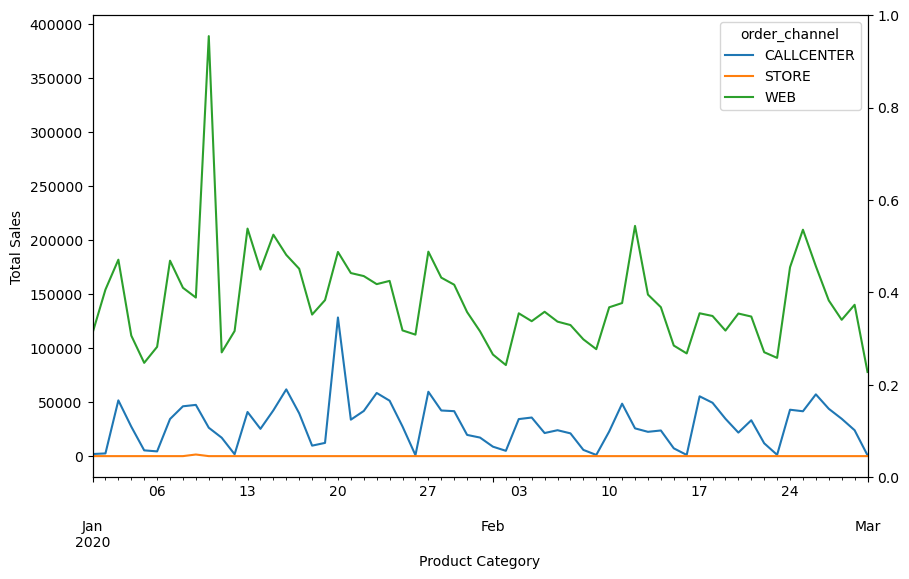

In [78]:

ax = sales_by_category_and_date.plot(figsize=(10, 6))


ax.set_xlabel('Product Category')
ax.set_ylabel('Total Sales')

ax2 = ax.twinx()
ax2.set_xlabel('Date')

plt.show()

In [79]:
df.head()

,Order_id,Inserted Date,Item_id,qty_Price,Order_Status,order_channel,qty,shippingmethod,product_category,Customer_ID,total_sales_each_item
0,125943,2020-02-05,58416,0.19,Invoiced,CALLCENTER,100,STORE,Stationery,9693,19.00
1,125943,2020-02-05,47390,0.61,Invoiced,CALLCENTER,20,STORE,Stationery,9693,12.20
2,125943,2020-02-05,47384,1.69,Invoiced,CALLCENTER,80,STORE,Stationery,9693,135.20
3,212252,2020-02-29,48014,11.51,Invoiced,CALLCENTER,1,COURIER,Toys,9694,11.51
4,212252,2020-02-29,24906,1.68,Invoiced,CALLCENTER,1,COURIER,Toys,9694,1.68


In [80]:
df['Order_Status'].unique()

['Invoiced', 'Cancelled']
Categories (2, object): ['Cancelled', 'Invoiced']

# Compute the average basket units

In [81]:
# Calculate the average basket units
total_quantity = df["qty"].sum()
total_orders = df["Order_id"].nunique()
average_basket_units = total_quantity / total_orders
print("Average Basket Units: ", average_basket_units)

Average Basket Units:  1.9036981310037784


# calculate average basket value

In [82]:
# Calculate the average basket value
total_sales = df["total_sales_each_item"].sum()
average_basket_value = total_sales / total_orders
print("Average Basket Value: ", average_basket_value)

Average Basket Value:  59.21118641117916


# Visualize the results

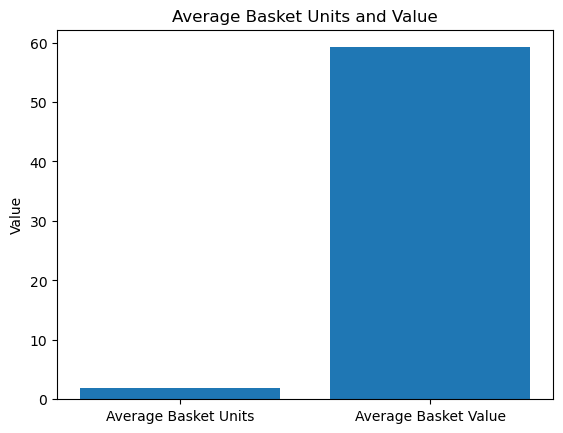

In [83]:
fig, ax = plt.subplots()
ax.bar(["Average Basket Units", "Average Basket Value"], [average_basket_units, average_basket_value])
ax.set_ylabel("Value")
ax.set_title("Average Basket Units and Value")
plt.show()

# ------------------------------------------------------------------------------------------------

# 2. Customer segmentation based on analysis of order data

In [84]:
# Get the count of unique values in Order_Status and Order_channel columns

In [85]:
df['Order_Status'].value_counts()

Invoiced     246031
Cancelled     57182
Name: Order_Status, dtype: int64

In [86]:
df['order_channel'].value_counts()

WEB           286322
CALLCENTER     16890
STORE              1
Name: order_channel, dtype: int64

In [87]:
#customer segments based on Order_Status that the order has been cancelled and Order_channel via 
#call center or web or at the store.

web_= df[(df['Order_Status'] == 'Cancelled') & (df['order_channel'] == 'WEB')]

call_center = df[(df['Order_Status'] == 'Cancelled') & (df['order_channel'] == 'CALLCENTER')]

store_ = df[(df['Order_Status'] == 'Cancelled') & (df['order_channel'] == 'STORE')]

In [88]:
web_grouped_cancelled = web_.groupby('Customer_ID')['Order_id'].count().sort_values(ascending = False).reset_index()

In [89]:
web_grouped_cancelled.head()# top 5 customer ids with the most cancellations using web as an 
#order channel.

,Customer_ID,Order_id
0,127919,230
1,110552,80
2,40411,71
3,133030,66
4,126808,65


In [90]:
call_center_grouped_cancelled = call_center.groupby('Customer_ID')['Order_id'].count().sort_values(ascending = False).reset_index()

In [91]:
call_center_grouped_cancelled.head()# top 5 customer ids with the most cancellations using call center as an 
#order channel.

,Customer_ID,Order_id
0,110731,184
1,110737,176
2,110736,167
3,110732,78
4,110735,74


In [92]:
store_grouped_cancelled = store_.groupby('Customer_ID')['Order_id'].count().sort_values(ascending = False).reset_index()

In [93]:
store_grouped_cancelled

# from the store there wan no cancellation from January 2020 to March 2020.



# there are more cancellations using the web store rather than the call center , 
#let alone the store that had no cancellations during the period of january 2020 to march 2020.

,Customer_ID,Order_id


In [94]:
df.head()

,Order_id,Inserted Date,Item_id,qty_Price,Order_Status,order_channel,qty,shippingmethod,product_category,Customer_ID,total_sales_each_item
0,125943,2020-02-05,58416,0.19,Invoiced,CALLCENTER,100,STORE,Stationery,9693,19.00
1,125943,2020-02-05,47390,0.61,Invoiced,CALLCENTER,20,STORE,Stationery,9693,12.20
2,125943,2020-02-05,47384,1.69,Invoiced,CALLCENTER,80,STORE,Stationery,9693,135.20
3,212252,2020-02-29,48014,11.51,Invoiced,CALLCENTER,1,COURIER,Toys,9694,11.51
4,212252,2020-02-29,24906,1.68,Invoiced,CALLCENTER,1,COURIER,Toys,9694,1.68


# RFM Analysis

a technique used to segment customers based on three factors - Recency (how recently they made a purchase), Frequency (how often they make purchases), and Monetary (how much they spend on each purchase). This approach can help identify which customers are the most valuable to the business and target them accordingly.

In [95]:
#calculates the next day after the latest order date.
#the reference date for calculating Recency in RFM analysis is next_day.
next_day = df['Inserted Date'].max() + dt.timedelta(days=1)

## Calculate recency, frequency, and monetary value.
df_rfm = df.groupby(['Customer_ID']).agg({
    'Inserted Date': lambda x: (next_day - x.max()).days,
    'Order_id': 'count',
    'total_sales_each_item': 'sum'
}).reset_index()



In [96]:
# Rename columns for clarity
df_rfm.rename(columns={'Inserted Date': 'Recency', 
                        'Order_id': 'Frequency', 
                        'total_sales_each_item': 'Monetary'}, inplace=True)

In [97]:
df_rfm

,Customer_ID,Recency,Frequency,Monetary
0,8890,6,6,78.08
1,8891,39,1,629.57
2,8892,26,1,67.76
3,8893,2,1,5.71
4,8894,59,1,80.65
...,...,...,...,...
130359,139286,9,2,13.35
130360,139287,15,7,29.77
130361,139288,40,1,8.81
130362,139289,59,1,10.13


In [98]:
# Create RFM scores based on distribution percentiles


#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
df_rfm["recency_score"] = pd.qcut(df_rfm["Recency"],4, labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
df_rfm["frequency_score"] = pd.qcut(df_rfm["Frequency"].rank(method="first"), 4,labels=[1, 2, 3, 4])

#Total spend by the customer.The least money gets 1, the most money gets 4.
df_rfm["monetary_score"] = pd.qcut(df_rfm["Monetary"], 4,labels=[1, 2, 3, 4] )

In [99]:
df_rfm

,Customer_ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,8890,6,6,78.08,4,4,4
1,8891,39,1,629.57,2,1,4
2,8892,26,1,67.76,3,1,4
3,8893,2,1,5.71,4,1,1
4,8894,59,1,80.65,1,1,4
...,...,...,...,...,...,...,...
130359,139286,9,2,13.35,4,4,2
130360,139287,15,7,29.77,4,4,3
130361,139288,40,1,8.81,2,3,1
130362,139289,59,1,10.13,1,3,1


In [100]:
df_rfm["RFM_Segment"] = df_rfm["recency_score"].astype(str) + df_rfm["frequency_score"].astype(str) + df_rfm["monetary_score"].astype(str)

In [101]:
df_rfm

,Customer_ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment
0,8890,6,6,78.08,4,4,4,444
1,8891,39,1,629.57,2,1,4,214
2,8892,26,1,67.76,3,1,4,314
3,8893,2,1,5.71,4,1,1,411
4,8894,59,1,80.65,1,1,4,114
...,...,...,...,...,...,...,...,...
130359,139286,9,2,13.35,4,4,2,442
130360,139287,15,7,29.77,4,4,3,443
130361,139288,40,1,8.81,2,3,1,231
130362,139289,59,1,10.13,1,3,1,131


In [102]:
df_rfm["RFM Score"] = df_rfm[["recency_score", "frequency_score", "monetary_score"]].sum(axis=1)
df_rfm

,Customer_ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM Score
0,8890,6,6,78.08,4,4,4,444,12
1,8891,39,1,629.57,2,1,4,214,7
2,8892,26,1,67.76,3,1,4,314,8
3,8893,2,1,5.71,4,1,1,411,6
4,8894,59,1,80.65,1,1,4,114,6
...,...,...,...,...,...,...,...,...,...
130359,139286,9,2,13.35,4,4,2,442,10
130360,139287,15,7,29.77,4,4,3,443,11
130361,139288,40,1,8.81,2,3,1,231,6
130362,139289,59,1,10.13,1,3,1,131,5


In [103]:
segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}


In [104]:
df_rfm["Segment_labels"] = df_rfm["RFM_Segment"]
df_rfm["Segment_labels"] = df_rfm["Segment_labels"].replace(segt_map, regex= True)

In [105]:
df_rfm

,Customer_ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM Score,Segment_labels
0,8890,6,6,78.08,4,4,4,444,12,VIP
1,8891,39,1,629.57,2,1,4,214,7,Top Recent
2,8892,26,1,67.76,3,1,4,314,8,Top Recent
3,8893,2,1,5.71,4,1,1,411,6,Low New
4,8894,59,1,80.65,1,1,4,114,6,Top at Risk
...,...,...,...,...,...,...,...,...,...,...
130359,139286,9,2,13.35,4,4,2,442,10,Medium Potential
130360,139287,15,7,29.77,4,4,3,443,11,High Promising
130361,139288,40,1,8.81,2,3,1,231,6,Low Loyal
130362,139289,59,1,10.13,1,3,1,131,5,Need Activation


# Pareto

Pareto analysis can help us in identifying the most important customers based on their contribution to the total revenue. In this case, we can apply the 80/20 rule, which states that 80% of the revenue comes from 20% of the customers. By identifying and focusing on the top 20% of customers, we can maximize our revenue and improve customer retention. We can use the RFM scores we calculated earlier to segment our customers and identify the top 20% based on their scores.

In [106]:
seg_pareto = df_rfm.groupby(["Segment_labels"]).agg({"Monetary": np.sum,
                                                          "Customer_ID": pd.Series.count }).reset_index()
seg_pareto

,Segment_labels,Monetary,Customer_ID
0,High Loyal,172864.56,5360
1,High New,209433.96,6358
2,High Promising,454495.67,13724
3,Low Loyal,126840.51,17052
4,Low New,51355.39,6942
5,Medium Loyal,63018.21,3881
6,Medium New,178468.92,11868
7,Medium Potential,139593.73,8518
8,Need Activation,425013.78,24073
9,Top Recent,3468887.49,14763


In [107]:
seg_pareto["Customer_ID"].sum()

130364

In [108]:
data_process = df_rfm.groupby(["Segment_labels"]).agg({"Recency": np.min,
                                            "Monetary": np.sum}).reset_index()

In [109]:
data_process

,Segment_labels,Recency,Monetary
0,High Loyal,32,172864.56
1,High New,1,209433.96
2,High Promising,1,454495.67
3,Low Loyal,16,126840.51
4,Low New,1,51355.39
5,Medium Loyal,32,63018.21
6,Medium New,1,178468.92
7,Medium Potential,1,139593.73
8,Need Activation,47,425013.78
9,Top Recent,1,3468887.49


In [110]:
seg_pareto["Monetary%"] = seg_pareto["Monetary"]/seg_pareto["Monetary"].sum()

seg_pareto = seg_pareto.sort_values(by=["Monetary%"], ascending = False)
seg_pareto

,Segment_labels,Monetary,Customer_ID,Monetary%
11,VIP,3548829.63,11158,0.336493
9,Top Recent,3468887.49,14763,0.328913
10,Top at Risk,1707717.04,6667,0.161922
2,High Promising,454495.67,13724,0.043094
8,Need Activation,425013.78,24073,0.040299
1,High New,209433.96,6358,0.019858
6,Medium New,178468.92,11868,0.016922
0,High Loyal,172864.56,5360,0.016391
7,Medium Potential,139593.73,8518,0.013236
3,Low Loyal,126840.51,17052,0.012027


In [111]:
seg_pareto["CumulativePercentage"] = (seg_pareto["Monetary"].cumsum()/
                                      seg_pareto["Monetary"].sum()*100).round(2)
seg_pareto

#"CumulativePercentage", which can be used to analyze the distribution of the monetary values and to 
#perform Pareto analysis

#the cumulative percentage of the total monetary value contributed by each row in the "Monetary" column,
#understanding the distribution of the monetary values and identifying the most important contributors.

,Segment_labels,Monetary,Customer_ID,Monetary%,CumulativePercentage
11,VIP,3548829.63,11158,0.336493,33.65
9,Top Recent,3468887.49,14763,0.328913,66.54
10,Top at Risk,1707717.04,6667,0.161922,82.73
2,High Promising,454495.67,13724,0.043094,87.04
8,Need Activation,425013.78,24073,0.040299,91.07
1,High New,209433.96,6358,0.019858,93.06
6,Medium New,178468.92,11868,0.016922,94.75
0,High Loyal,172864.56,5360,0.016391,96.39
7,Medium Potential,139593.73,8518,0.013236,97.71
3,Low Loyal,126840.51,17052,0.012027,98.92


In [112]:
# Find the row index where the cumulative percentage first exceeds 80%
idx_80 = (seg_pareto["CumulativePercentage"] >= 80).idxmax()
idx_80

10

In [113]:
# Calculate the proportion of the dataset that corresponds to the top 20% of the values
proportion_20 = seg_pareto.loc[:idx_80, 'Monetary'].sum() / seg_pareto['Monetary'].sum()
proportion_20

0.8273283583906802

In [114]:
print("The top 20% of values contribute {:.2%} of the total monetary value.".format(proportion_20))

The top 20% of values contribute 82.73% of the total monetary value.


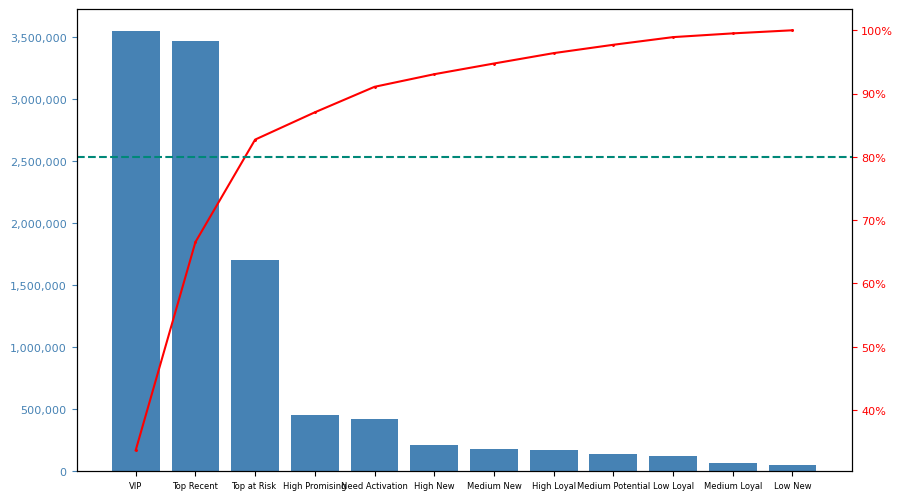

In [115]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(seg_pareto['Segment_labels'], seg_pareto['Monetary'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(seg_pareto['Segment_labels'], seg_pareto['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(tkr.PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])
ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 6)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()


# COHORT ANALYSIS

# Cohort analysis is a for of behavioral analysis that groups customers into cohorts which means into time spans.

Below we are going to perform this kind of analysis

In [116]:
df.head()

,Order_id,Inserted Date,Item_id,qty_Price,Order_Status,order_channel,qty,shippingmethod,product_category,Customer_ID,total_sales_each_item
0,125943,2020-02-05,58416,0.19,Invoiced,CALLCENTER,100,STORE,Stationery,9693,19.00
1,125943,2020-02-05,47390,0.61,Invoiced,CALLCENTER,20,STORE,Stationery,9693,12.20
2,125943,2020-02-05,47384,1.69,Invoiced,CALLCENTER,80,STORE,Stationery,9693,135.20
3,212252,2020-02-29,48014,11.51,Invoiced,CALLCENTER,1,COURIER,Toys,9694,11.51
4,212252,2020-02-29,24906,1.68,Invoiced,CALLCENTER,1,COURIER,Toys,9694,1.68


In [117]:
df['Inserted Date'].max()

Timestamp('2020-03-01 00:00:00')

In [118]:
df['Inserted Date'].min()

Timestamp('2020-01-01 00:00:00')

In [119]:
df['Order_Month'] = df['Inserted Date'].dt.to_period('M')

In [120]:
# Create a cohort group based on the month of the first purchase
df.set_index('Customer_ID', inplace=True)
df['CohortMonth'] = df.groupby(level=0)['Inserted Date'].transform('min').dt.to_period('M')
df.reset_index(inplace=True)

In [121]:
# Calculate the number of customers in each cohort group
cohorts = df.groupby(['CohortMonth', 'Order_Month'])['Customer_ID'].nunique().reset_index()
cohorts.rename(columns={'Customer_ID': 'Total_Customers'}, inplace=True)

In [122]:
cohorts

,CohortMonth,Order_Month,Total_Customers
0,2020-01,2020-01,78347
1,2020-01,2020-02,12684
2,2020-01,2020-03,409
3,2020-02,2020-02,50983
4,2020-02,2020-03,228
5,2020-03,2020-03,1034


In [123]:
# Extract the year and month for each cohort and order month
def extract_month(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

cohort_months = extract_month(cohorts, 'CohortMonth')
order_months = extract_month(cohorts, 'Order_Month')

In [124]:
cohort_months

(0    2020
 1    2020
 2    2020
 3    2020
 4    2020
 5    2020
 Name: CohortMonth, dtype: int64,
 0    1
 1    1
 2    1
 3    2
 4    2
 5    3
 Name: CohortMonth, dtype: int64)

In [125]:
order_months

(0    2020
 1    2020
 2    2020
 3    2020
 4    2020
 5    2020
 Name: Order_Month, dtype: int64,
 0    1
 1    2
 2    3
 3    2
 4    3
 5    3
 Name: Order_Month, dtype: int64)

we create two new columns in the cohorts DataFrame: CohortMonth and OrderMonth. The CohortMonth column contains the month and year in which each customer made their first purchase, and the OrderMonth column contains the month and year in which each subsequent purchase was made.

we extract the month and year from each column using the .dt.to_period('M') method, which converts the date to a Pandas period with a monthly frequency. This allows us to group the data by month and year.

Then, we calculate the number of months between the cohort month and order month. This is done by subtracting the cohort month from the order month, and then adding 12 times the difference in years (since there are 12 months in a year).

Finally, we add the n_months column to the cohorts DataFrame, which contains the number of months between the cohort month and each subsequent order month. This column will be used later to create the retention matrix.

In [126]:
# Calculate the number of months between the cohort month and order month
n_months = (order_months[1] - cohort_months[1]) + 12 * (order_months[0] - cohort_months[0])
cohorts['n_months'] = n_months

In [127]:
cohorts

,CohortMonth,Order_Month,Total_Customers,n_months
0,2020-01,2020-01,78347,0
1,2020-01,2020-02,12684,1
2,2020-01,2020-03,409,2
3,2020-02,2020-02,50983,0
4,2020-02,2020-03,228,1
5,2020-03,2020-03,1034,0


In [128]:
# Calculate the retention rate for each cohort group and number of months
cohort_group_size = cohorts.groupby('CohortMonth')['Total_Customers'].transform('sum')
cohorts['Retention_Rate'] = cohorts['Total_Customers'] / cohort_group_size

In [129]:
cohort_group_size

0    91440
1    91440
2    91440
3    51211
4    51211
5     1034
Name: Total_Customers, dtype: int64

In [130]:
cohorts

,CohortMonth,Order_Month,Total_Customers,n_months,Retention_Rate
0,2020-01,2020-01,78347,0,0.856813
1,2020-01,2020-02,12684,1,0.138714
2,2020-01,2020-03,409,2,0.004473
3,2020-02,2020-02,50983,0,0.995548
4,2020-02,2020-03,228,1,0.004452
5,2020-03,2020-03,1034,0,1.000000


In [131]:
# Pivot the table to create a retention matrix
retention_matrix = cohorts.pivot_table(index='CohortMonth',
                                       columns='n_months',
                                       values='Retention_Rate')

customers who made a purchase in the initial month (indicated by 0 in the column) and returned to make a purchase in each subsequent month (indicated by 1, 2, etc. in the columns).


in the first row of the matrix ( to the January 2020 cohort), 85,68% of customers made a purchase in the initial month (0), 13,87%  returned to make a purchase in the following month (1), while only 4,47% returned to make a purchase in the second month (2). This pattern continues for subsequent months, with a small proportion of customers returning to make a purchase in each subsequent month.



in the second row of the matrix ( to the February 2020 cohort), we see that 99.55% of customers made a purchase in the initial month (0), but only 0.45% returned to make a purchase in the following month (1). No customers returned to make a purchase in the second month (2). This indicates that the February 2020 cohort had lower retention rates than the January 2020 cohort.

 in the third row of the matrix ( to the March 2020 cohort), we see that 100% of customers made a purchase in the initial month (0), but none returned to make a purchase in the following months (1 or 2). This suggests that the March 2020 cohort had much lower retention rates than the previous two cohorts.
 
 
 You can see the table below:


In [132]:
retention_matrix

n_months,0,1,2
CohortMonth,,,
2020-01,0.856813,0.138714,0.004473
2020-02,0.995548,0.004452,NaN
2020-03,1.000000,NaN,NaN


# the retention matrix provides a visual representation of how well each cohort retained its customers over time. It can help identify trends in customer behavior and inform strategies for improving customer retention in the future.

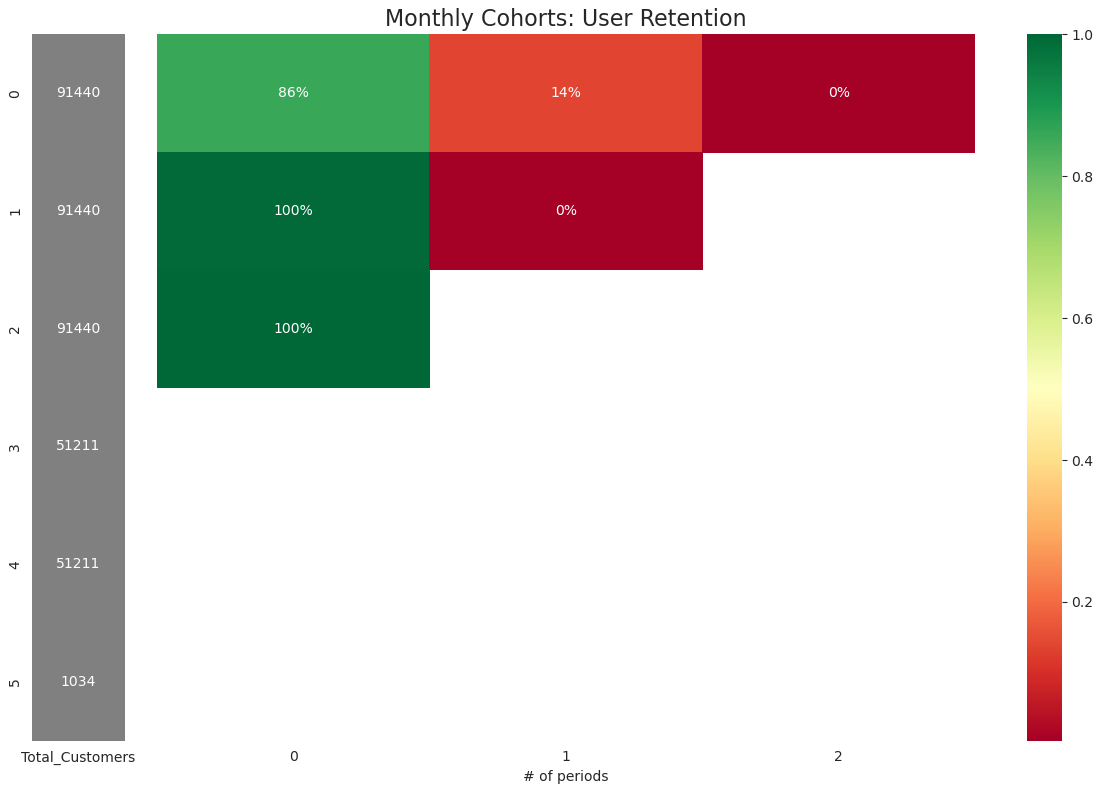

In [133]:
# Visualize the retention matrix
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_group_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['grey'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

# -------------------------------------------------------------

We are goint to use an unsupervised machine learning algorithm for such as clustering because we group together similar data points based on their features. The goal of clustering is to divide the data points into groups or clusters, so that the points within a cluster are as similar as possible, and the points in different clusters are as dissimilar as possible.

We are going to use k-means algorithm  because of its simplicity, efficiency, and ability to handle large datasets. It is also a partitional clustering algorithm, which means that it divides the data points into non-overlapping clusters, and each point belongs to only one cluster.
There are some disadvantages and limitations of k-means and that is that it requires us to specify the number of clusters in advance, which may not always be known a priori. 
Also, k-means can be sensitive to the initial placement of the centroids, and may not work well with non-linearly separable data.
But we are going to use this algorithm although.

The workflow goes as below:
1) Randomly initialize k centroids.
2) Assign each data point to the nearest centroid.
3) Recalculate the centroid of each cluster.
4) Repeat steps 2 and 3 until convergence.
The convergence is reached when the centroids stop moving, or the sum of squared distances between the data points and their assigned centroids (WCSS) reaches a minimum.

In [134]:
df.head()

,Customer_ID,Order_id,Inserted Date,Item_id,qty_Price,Order_Status,order_channel,qty,shippingmethod,product_category,total_sales_each_item,Order_Month,CohortMonth
0,9693,125943,2020-02-05,58416,0.19,Invoiced,CALLCENTER,100,STORE,Stationery,19.00,2020-02,2020-02
1,9693,125943,2020-02-05,47390,0.61,Invoiced,CALLCENTER,20,STORE,Stationery,12.20,2020-02,2020-02
2,9693,125943,2020-02-05,47384,1.69,Invoiced,CALLCENTER,80,STORE,Stationery,135.20,2020-02,2020-02
3,9694,212252,2020-02-29,48014,11.51,Invoiced,CALLCENTER,1,COURIER,Toys,11.51,2020-02,2020-02
4,9694,212252,2020-02-29,24906,1.68,Invoiced,CALLCENTER,1,COURIER,Toys,1.68,2020-02,2020-02


First, we need to preprocess the data and prepare it for analysis. This involves tasks such as removing any duplicates or missing values, transforming categorical variables into numerical ones, and normalizing the data.

Next, we need to select the most relevant features that will be used to segment the customers. This involves identifying which variables are most strongly correlated with customer behavior.

In the end we can apply clustering algorithms to group customers based on their behavior.For customer segmentation we usually use k-means clustering, which groups customers into k clusters based on their similarity.

In [135]:
#import certain methods and modules from sci-kit learn library.

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [136]:
# Remove any duplicates and missing values, but in this case it is unnecessary because we do not have any missing values.
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

Convert categorical variables into numerical ones because Machine learning models typically work with numerical data, so we need to convert categorical variables into numerical ones in order to include them in our models. This is because most algorithms use mathematical operations such as addition, subtraction, multiplication, and division, which are not applicable to categorical data. By converting categorical variables into numerical ones, we can represent them as numbers that can be used in mathematical calculations.

In [137]:
# Convert categorical variables into numerical ones
le = LabelEncoder()
df['order_channel'] = le.fit_transform(df['order_channel'])
df['Order_Status'] = le.fit_transform(df['Order_Status'])

Normalization means rescaling the values of numerical features to a common scale, typically between 0 and 1. Normalizing the data is important for machine learning algorithms because it can help to avoid some of the problems that can arise when features have different scales or units. For example, features with larger scales may dominate the model's behavior and make it difficult to detect patterns in features with smaller scales. By normalizing the data, we ensure that all features contribute equally to the model and that the model is not biased towards features with larger scales. This can lead to more accurate and reliable predictions.

In [138]:
# Normalize the data
scaler = MinMaxScaler()
df[['qty_Price', 'qty', 'total_sales_each_item']] = scaler.fit_transform(df[['qty_Price', 'qty', 'total_sales_each_item']])

In [139]:
# Calculate correlation matrix
corr = df.corr(numeric_only=True)

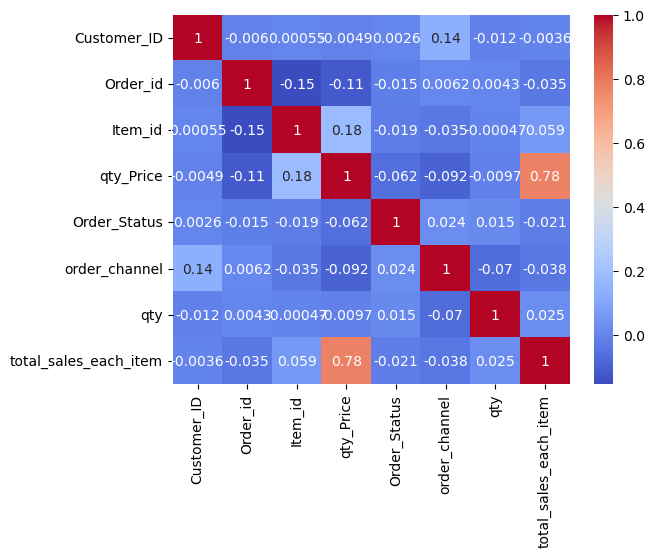

In [140]:
# Plot heatmap of correlations
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Based on the heatmap, we can see that the most relevant features for customer segmentation are qty_price, qty, and total_sales_each_item.

In [141]:
from sklearn.cluster import KMeans

# Select features for clustering
X = df[['qty_Price', 'qty', 'total_sales_each_item']]

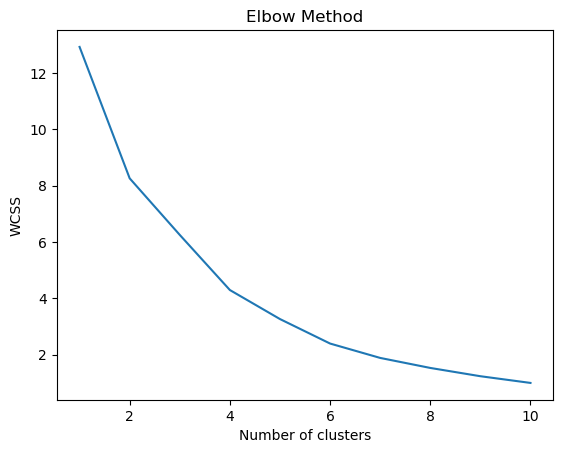

In [142]:
# Determine optimal number of clusters
wcss = []#Create an empty list called wcss to store the within-cluster sum of squares (WCSS) values.
for i in range(1, 11):#Loop through values of i from 1 to 10 (inclusive),to determine the optimal number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    #Create a KMeans object with n_clusters set to i.
    #init set to 'k-means++' (a method for selecting initial cluster centers).
    #max_iter set to 300 (the maximum number of iterations for each run of the algorithm.
    #random_state set to 0 (to ensure reproducibility).
    
    kmeans.fit(X)#Fit the KMeans model to the data X.
    wcss.append(kmeans.inertia_)#Calculate the WCSS for the current value of i and append it to the wcss list.
    
plt.plot(range(1, 11), wcss)#Plot the WCSS values for each value of i on a line chart with 
#x-axis values ranging from 1 to 10

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

we are going to to plot the total within-cluster sum of squares (WCSS) as a function of the number of clusters and look for the "elbow point" in the plot, where the rate of decrease of WCSS slows down significantly.

The WCSS is the sum of the squared distances between each data point and its cluster centroid. When we increase the number of clusters, WCSS tends to decrease because the smaller clusters can better fit the data points. However,adding more clusters will not lead to a significant decrease in WCSS, and this is the point where we choose the number of clusters.

Therefore, the elbow method helps us to choose an optimal number of clusters by identifying the point on the plot where the decrease in WCSS slows down and becomes negligible. 
It represents the best trade-off between the number of clusters and the amount of variance explained by the clustering model.

In [143]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

#y_kmeansFit the KMeans model to the data X and assign each data point to a cluster based 
#on the centroids calculated by the algorithm.



In [144]:
# Add cluster labels to the dataset
df['Cluster'] = y_kmeans

In [145]:
df

,Customer_ID,Order_id,Inserted Date,Item_id,qty_Price,Order_Status,order_channel,qty,shippingmethod,product_category,total_sales_each_item,Order_Month,CohortMonth,Cluster
0,9693,125943,2020-02-05,58416,0.000004,1,0,0.344262,STORE,Stationery,0.012326,2020-02,2020-02,2
1,9693,125943,2020-02-05,47390,0.000013,1,0,0.081967,STORE,Stationery,0.012298,2020-02,2020-02,0
2,9693,125943,2020-02-05,47384,0.000036,1,0,0.278689,STORE,Stationery,0.012810,2020-02,2020-02,2
3,9694,212252,2020-02-29,48014,0.000243,1,0,0.019672,COURIER,Toys,0.012295,2020-02,2020-02,0
4,9694,212252,2020-02-29,24906,0.000035,1,0,0.019672,COURIER,Toys,0.012254,2020-02,2020-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303208,138942,146998,2020-01-31,8553,0.000107,1,2,0.019672,STORE,Books,0.012268,2020-01,2020-01,0
303209,138942,146998,2020-01-31,16293,0.000106,1,2,0.019672,STORE,Books,0.012268,2020-01,2020-01,0
303210,138943,171281,2020-02-09,20381,0.000139,1,2,0.019672,COURIER,Books,0.012274,2020-02,2020-02,0
303211,138943,171281,2020-02-09,22197,0.000149,1,2,0.019672,COURIER,Books,0.012276,2020-02,2020-02,0


In [146]:
# Calculate mean values for each cluster
cluster_means = df.groupby('Cluster').mean(numeric_only=True)[['qty_Price', 'qty', 'total_sales_each_item']]

In [147]:
cluster_means

,qty_Price,qty,total_sales_each_item
Cluster,,,
0,0.000693,0.019987,0.012387
1,1.000000,0.032787,1.000000
2,0.000148,0.233774,0.013886


---> Cluster 0 has a  low 'qty_Price' and 'total_sales_each_item' compared to the other clusters. This shows us that customers in this cluster tend to purchase lower-priced items or make smaller purchases overall.

---> Cluster 1 has the highest 'qty_Price' and 'total_sales_each_item' values, indicating that customers in this cluster tend to purchase more expensive items and make larger purchases overall.

---> Cluster 2 has a low 'qty_Price' but a high 'qty' compared to the other clusters, suggesting that customers in this cluster tend to purchase higher quantities of lower-priced items.